In [14]:
# trying a simple training example




In [15]:
# the custom model
import torch
import torch.nn as nn
from my_extension import (
    CustomLinear, 
    CustomReLU
)

class CustomNeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, hidden_size_2, output_size):
        super(CustomNeuralNet, self).__init__()
        self.fc1 = CustomLinear(input_size, hidden_size)
        self.ac1 = CustomReLU()
        self.fc2 = CustomLinear(hidden_size, hidden_size_2)
        self.ac2 = CustomReLU()
        self.fc3 = CustomLinear(hidden_size_2, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        x = self.ac2(x)
        x = self.fc3(x)
        return x



In [16]:
#3 comparing the custom net with a standard net
class StandardNeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, hidden_size_2, output_size):
        super(StandardNeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size, bias=False)
        self.ac1 = nn.LeakyReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size_2, bias=False)
        self.ac2 = nn.LeakyReLU()
        self.fc3 = nn.Linear(hidden_size_2, output_size, bias=False)

    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        x = self.ac2(x)
        x = self.fc3(x)
        return x


In [17]:
#3 comparing the custom net with a standard net
class MixedNeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, hidden_size_2, output_size):
        super(MixedNeuralNet, self).__init__()
        self.fc1 = CustomLinear(input_size, hidden_size)
        self.ac1 = nn.ReLU()
        self.fc2 = CustomLinear(hidden_size, hidden_size_2)
        self.ac2 = nn.ReLU()
        self.fc3 = CustomLinear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        x = self.ac2(x)
        x = self.fc3(x)
        return x



In [18]:
class TinyNeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(TinyNeuralNet, self).__init__()
        self.fc1 = CustomLinear(input_size, hidden_size)
        self.ac1 = CustomReLU()
        self.fc2 = CustomLinear(hidden_size, output_size)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        return x

In [19]:
import torch

# Settings
num_samples = 1000  # Number of data points
noise_factor = 0.2  # Noise factor for output data

# Generate data for a single feature
inputs = torch.linspace(-1, 1, steps=num_samples).unsqueeze(1)  # Shape: [num_samples, 1]

# Add a little noise to inputs
inputs += torch.randn(inputs.shape) * noise_factor

# Normalize and center the input data
inputs_normalized = (inputs - inputs.mean()) / inputs.std()

# Create a simple linear relationship (y = mx + b) with some noise
m = torch.tensor([2.0])  # Slope
b = torch.tensor([1.0])  # Intercept

# Generate the target output with noise
targets = m * inputs_normalized + b
targets += torch.randn(targets.shape) * noise_factor  # Adding noise

target_mean = targets.mean()
shifted_targets = targets - target_mean

# Split into training and testing sets
train_inputs = inputs_normalized[:800]  # 80% for training
train_outputs = shifted_targets[:800]
test_inputs = inputs_normalized[800:]  # 20% for testing
test_outputs = shifted_targets[800:]


In [20]:
train_inputs = train_inputs.to('mps')
train_outputs = train_outputs.to('mps')

In [21]:
# Initialize the custom neural network
num_features = 1
hidden_size = 100
hidden_size_2 = 5
output_size = 1

standard_model = None
standard_model = StandardNeuralNet(
    input_size=num_features,
    hidden_size=hidden_size,
    hidden_size_2=hidden_size_2, 
    output_size=1
).to('mps')

custom_model = None
custom_model = CustomNeuralNet(
    input_size=num_features,
    hidden_size=hidden_size,
    hidden_size_2=hidden_size_2,
    output_size=output_size
).to('mps')

mixed_model = None
mixed_model = MixedNeuralNet(
    input_size=num_features,
    hidden_size=hidden_size,
    hidden_size_2=hidden_size_2,
    output_size=output_size
).to('mps')


tiny_model = None
tiny_model = TinyNeuralNet(
    input_size=num_features,
    hidden_size=hidden_size,
    output_size=output_size
).to('mps')

In [22]:
# Initialize the custom neural network
# model = StandardNeuralNet(input_size=num_features, hidden_size=1000, output_size=1)
# model.to('mps')


In [23]:
tiny_model

TinyNeuralNet(
  (fc1): CustomLinear()
  (ac1): CustomReLU(MPS-based ReLU)
  (fc2): CustomLinear()
)

In [24]:
model = standard_model

# graidient clipping
#torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)



# set criterion and choose adam optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


# Simple Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(train_inputs)
    loss = criterion(outputs, train_outputs)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
        
    # if (epoch+1) % 100 == 0:
    #     for name, param in model.named_parameters():
    #         print(f"Gradients of {name}: {param.grad}")


Epoch [10/1000], Loss: 1.1811
Epoch [20/1000], Loss: 0.2137
Epoch [30/1000], Loss: 0.0548
Epoch [40/1000], Loss: 0.0739
Epoch [50/1000], Loss: 0.0518
Epoch [60/1000], Loss: 0.0396
Epoch [70/1000], Loss: 0.0379
Epoch [80/1000], Loss: 0.0378
Epoch [90/1000], Loss: 0.0376
Epoch [100/1000], Loss: 0.0375
Epoch [110/1000], Loss: 0.0374
Epoch [120/1000], Loss: 0.0374
Epoch [130/1000], Loss: 0.0374
Epoch [140/1000], Loss: 0.0374
Epoch [150/1000], Loss: 0.0374
Epoch [160/1000], Loss: 0.0374
Epoch [170/1000], Loss: 0.0374
Epoch [180/1000], Loss: 0.0374
Epoch [190/1000], Loss: 0.0374
Epoch [200/1000], Loss: 0.0374
Epoch [210/1000], Loss: 0.0374
Epoch [220/1000], Loss: 0.0374
Epoch [230/1000], Loss: 0.0374
Epoch [240/1000], Loss: 0.0374
Epoch [250/1000], Loss: 0.0374
Epoch [260/1000], Loss: 0.0374
Epoch [270/1000], Loss: 0.0374
Epoch [280/1000], Loss: 0.0374
Epoch [290/1000], Loss: 0.0374
Epoch [300/1000], Loss: 0.0374
Epoch [310/1000], Loss: 0.0374
Epoch [320/1000], Loss: 0.0374
Epoch [330/1000],

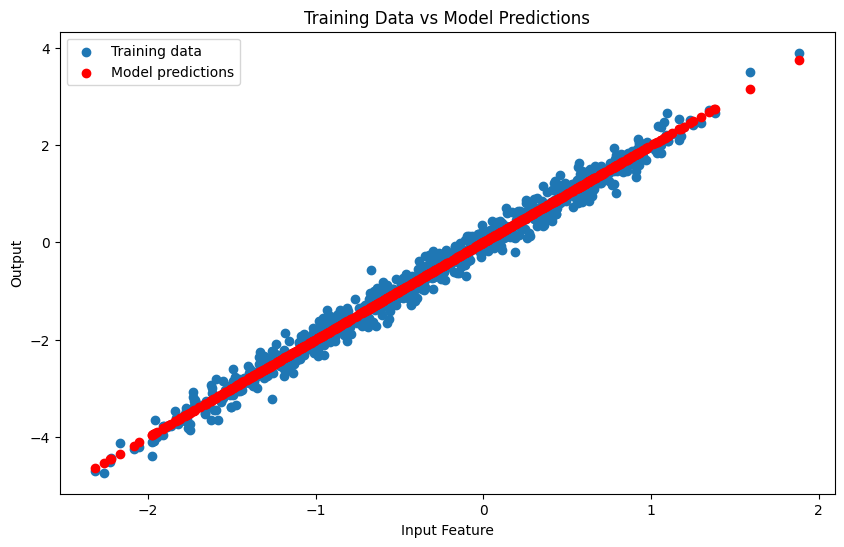

In [25]:
import matplotlib
import matplotlib.pyplot as plt

# Assuming `train_inputs` and `train_outputs` are your training data
# And `model` is your trained model

# Move the data to the same device as the model
train_inputs, train_outputs = train_inputs.to('mps'), train_outputs.to('mps')

# Get predictions from the model
with torch.no_grad():
    predictions = model(train_inputs)

# Convert tensors to numpy for plotting
train_inputs_np = train_inputs.cpu().numpy()
train_outputs_np = train_outputs.cpu().numpy()
predictions_np = predictions.cpu().numpy()

# Assuming a single feature for simplicity in plotting
plt.figure(figsize=(10, 6))
plt.scatter(train_inputs_np[:, 0], train_outputs_np[:, 0], label='Training data')
plt.scatter(train_inputs_np[:, 0], predictions_np[:, 0], label='Model predictions', color='red')
plt.xlabel('Input Feature')
plt.ylabel('Output')
plt.legend()
plt.title('Training Data vs Model Predictions')
plt.show()


In [14]:
# vanishing gradient? 
for name, param in model.named_parameters():
    print(f"Gradients of {name}: {param.grad}")


Gradients of fc1.weight: tensor([[-1.5860e-08],
        [-4.5120e-09],
        [ 2.3710e-09],
        [ 2.3401e-10],
        [ 3.1849e-09]], device='mps:0')
Gradients of fc2.weight: tensor([[-1.6785e-08, -4.2238e-09, -1.1625e-09, -8.0776e-10, -8.3367e-10]],
       device='mps:0')


In [15]:
# vanishing gradient? 
for name, param in model.named_parameters():
    print(f"Values of {name}: {param}")


Values of fc1.weight: Parameter containing:
tensor([[-1.3235],
        [ 1.7236],
        [ 0.4817],
        [ 0.3141],
        [ 0.3810]], device='mps:0', requires_grad=True)
Values of fc2.weight: Parameter containing:
tensor([[-1.2917,  1.8284, -0.9524, -0.0929, -1.3883]], device='mps:0',
       requires_grad=True)


In [25]:
model

CustomNeuralNet(
  (fc1): CustomLinear(input_features=1, output_features=10)
  (ac1): CustomReLU(MPS-based ReLU)
  (fc2): CustomLinear(input_features=10, output_features=10)
  (ac2): CustomReLU(MPS-based ReLU)
  (fc3): CustomLinear(input_features=10, output_features=1)
)